In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load
df = pd.read_csv('/content/Airline_preprocessed.csv')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df.shape

(103904, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

--------**STEP1---------**

Text(0.5, 1.0, 'Target distribution: satisfaction')

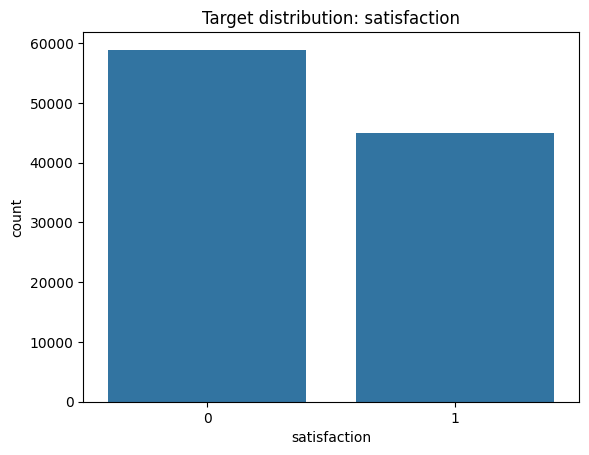

In [ ]:
# 1. Target (satisfaction) balance -check class imbalance (if heavily imbalanced, need strategies later).
df['satisfaction'].value_counts(dropna=False)
(df['satisfaction'].value_counts(normalize=True) * 100).round(2)
sns.countplot(x='satisfaction', data=df)
plt.title('Target distribution: satisfaction')


**Target Variable: Satisfaction**

Counts: 0 (Dissatisfied) = 58,821; 1 (Satisfied) = 45,083

Percentages: Dissatisfied = 56.61%; Satisfied = 43.39%

Visualization: Countplot confirms slightly more dissatisfied customers than satisfied.

**Conclusion:**

The dataset is slightly skewed toward dissatisfied customers, but the imbalance is not severe.

Standard modeling techniques can be used without special handling for class imbalance.

--------**STEP2---------**

In [ ]:
#2. Basic descriptive stats- find unexpected categories, confirm encoding (some categorical columns may already be numeric).
df.describe().T  # numeric summary


,count,mean,std,min,25%,50%,75%,max
Gender,103904.0,0.492541,0.499947,0.0,0.0,0.0,1.0,1.0
Customer Type,103904.0,0.182678,0.386404,0.0,0.0,0.0,0.0,1.0
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904.0,0.310373,0.462649,0.0,0.0,0.0,1.0,1.0
Class,103904.0,0.594135,0.620799,0.0,0.0,1.0,1.0,2.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


***Descriptive Statistics Insights***


**No Missing Values:**

All numerical columns have 103,904 non-null entries, so the dataset is complete.

**Central Tendency & Spread:**

Age: Mean ≈ 39.4, Median ≈ 40 → roughly symmetrical distribution.

Flight Distance: Mean ≈ 1189, Median ≈ 843 → right-skewed distribution.

Delays: Mean ≈ 15, Median = 0 → heavily right-skewed with some extreme outliers.

**Ranges & Outliers:**

Minimum and maximum values are generally reasonable.

Maximum delays (≈1590 minutes) indicate outliers in extreme cases.

Numeric Categorical Features:

Columns like Gender, Customer Type, Type of Travel, and Class are encoded numerically (0, 1, 2), not continuous.

**Quartiles & IQR:**

Q1, Median, Q3 highlight the spread of the middle 50% of data, confirming skewness in Flight Distance and Delay features.

**Key Takeaways:**

Dataset is complete and ready for modeling.

Some numerical features are skewed and may need transformation for certain models.

Encoded categorical features are already numeric, so they can be used directly with most algorithms.

In [ ]:
# quick check categorical uniques
for col in ['Gender','Customer Type','Type of Travel','Class']:
    print(col, ':', df[col].nunique())
    print(df[col].value_counts().head(), '\n')
#Identify frequent vs rare categories.Rare categories may need grouping or encoding during feature engineering.

Gender : 2
Gender
0    52727
1    51177
Name: count, dtype: int64 

Customer Type : 2
Customer Type
0    84923
1    18981
Name: count, dtype: int64 

Type of Travel : 2
Type of Travel
0    71655
1    32249
Name: count, dtype: int64 

Class : 3
Class
0    49665
1    46745
2     7494
Name: count, dtype: int64 



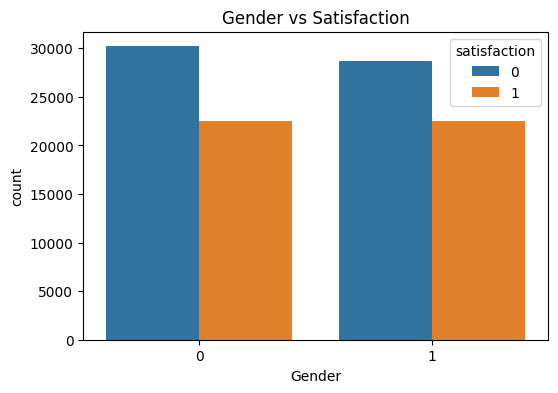

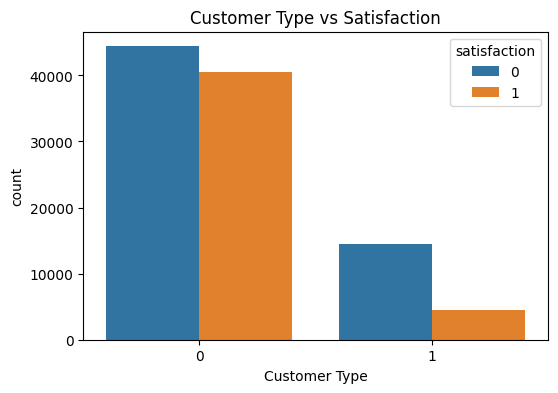

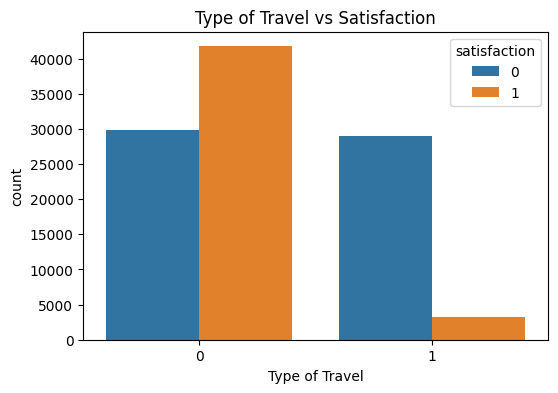

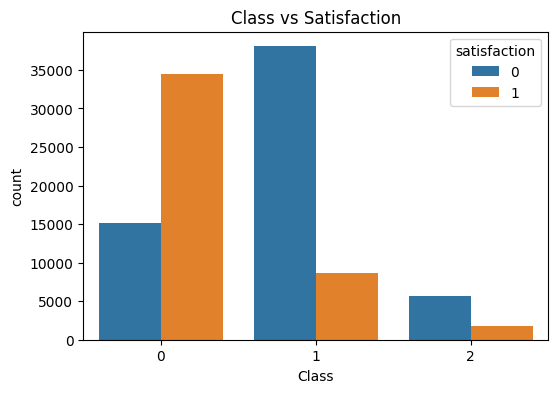

In [ ]:
cat_cols = ['Gender','Customer Type','Type of Travel','Class']

for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=c, hue='satisfaction', data=df)
    plt.title(f'{c} vs Satisfaction')
    plt.show()

Gender: Two categories with nearly equal counts—well-balanced.

Customer Type: Two categories, but one occurs much more frequently than the other.

Type of Travel: Two categories, with one clearly more common.

Class: Three categories; two are common while one is less frequent.

**Summary:** Gender is balanced, while Customer Type, Type of Travel, and Class are unevenly distributed.

--------**STEP3---------**

Text(0.5, 1.0, 'Flight distance by satisfaction')

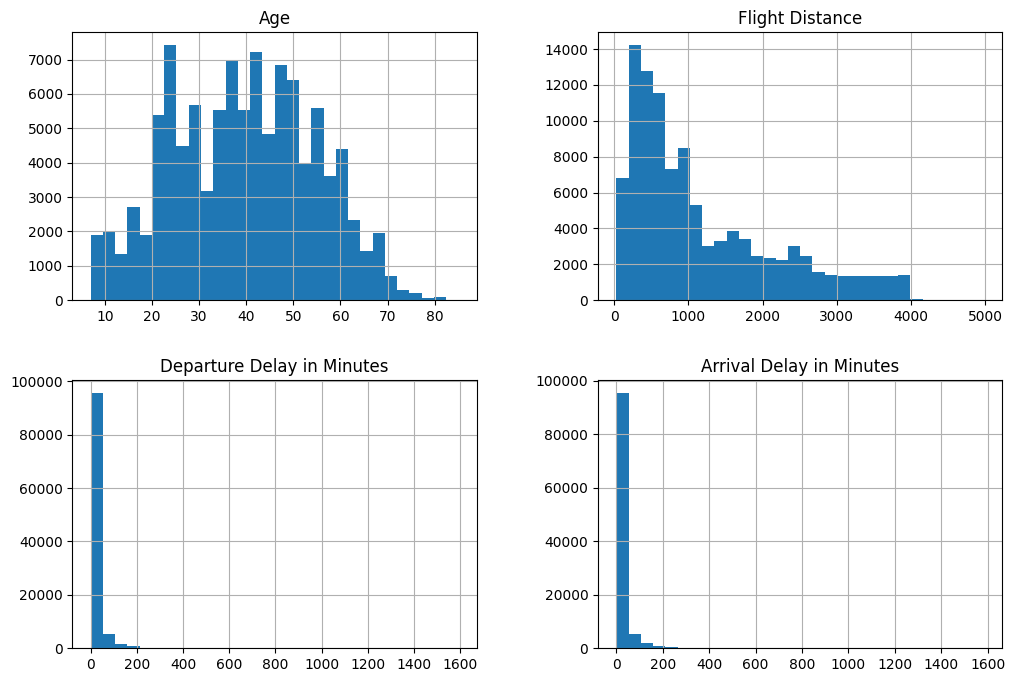

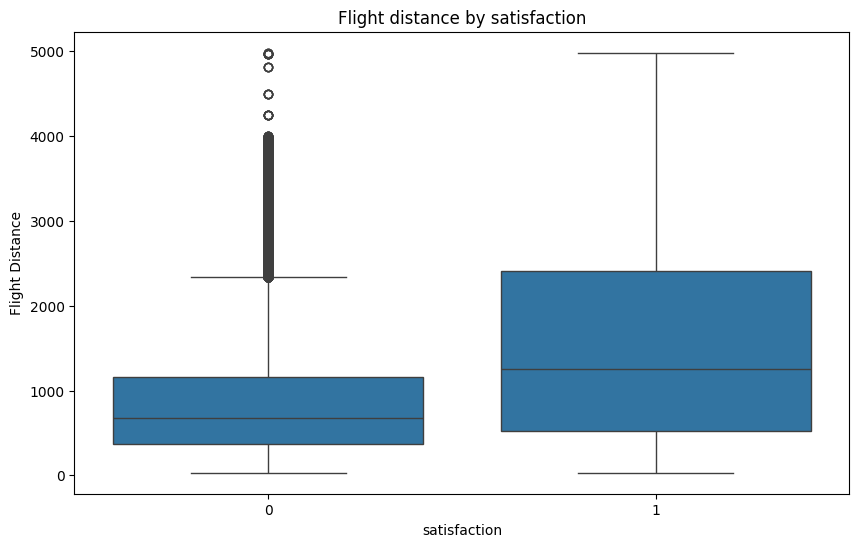

In [ ]:
#3.Visualize numerical distributions (histograms & boxplots)
num_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
df[num_cols].hist(bins=30, figsize=(12,8));

# boxplots grouped by satisfaction
plt.figure(figsize=(10,6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=df)
plt.title('Flight distance by satisfaction')


**Histograms:**

Age: Shows two main peaks—around late 20s/early 30s and late 40s/early 50s, indicating two main traveler groups.

Flight Distance: Skewed right; most flights are short, with a few very long flights.

Departure & Arrival Delays: Mostly 0 (on-time flights) with a few long delays, creating long right tails.

**Boxplot of Flight Distance by Satisfaction:**

Median flight distance is slightly higher for satisfied passengers, but overall distributions are similar.

Both groups have outliers for very long flights.

**Summary:** Flight Distance doesn’t show a strong difference between satisfied and dissatisfied passengers, which matches the weak correlation observed earlier.

--------**STEP4---------**

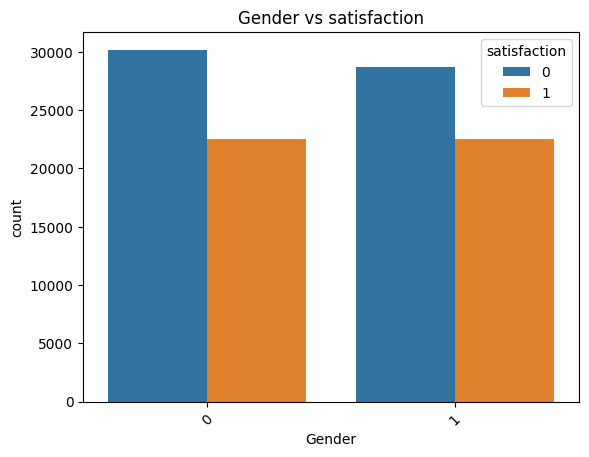

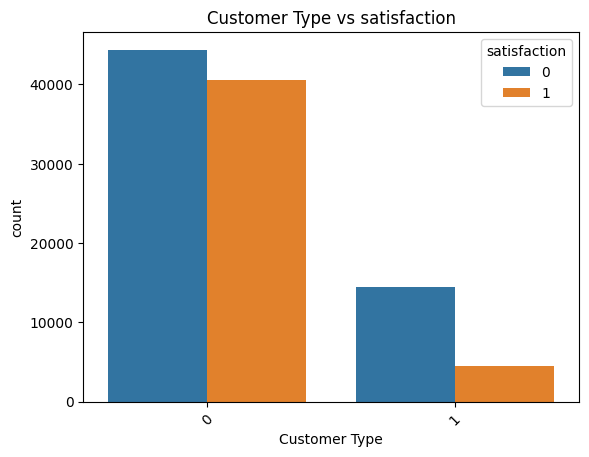

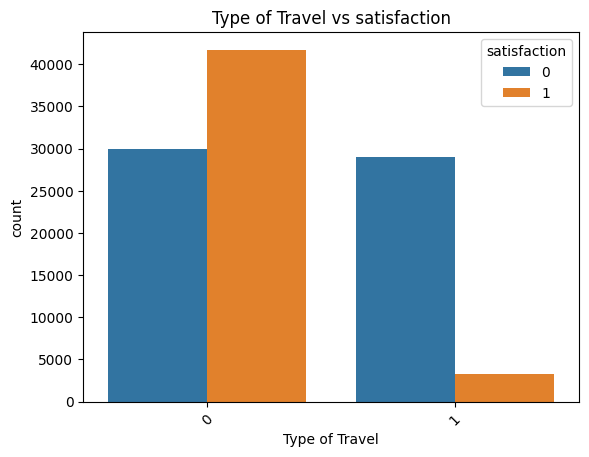

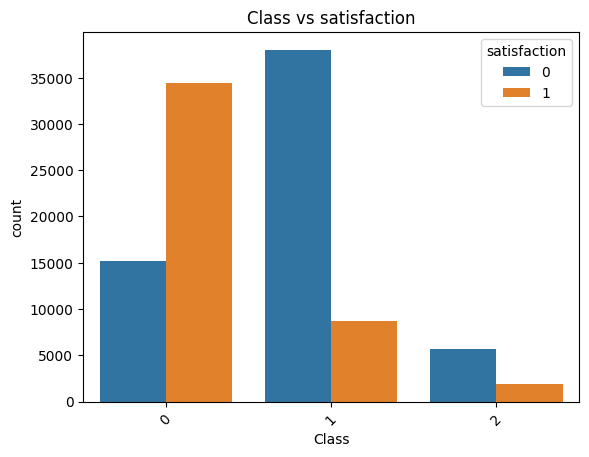

In [ ]:
#Categorical Features vs Satisfaction
cat_cols = ['Gender','Customer Type','Type of Travel','Class']
for c in cat_cols:
    sns.countplot(x=c, hue='satisfaction', data=df)
    plt.title(f'{c} vs satisfaction')
    plt.xticks(rotation=45)
    plt.show()


Gender vs Satisfaction: Both genders have similar satisfaction levels—gender doesn’t have much impact.

Customer Type vs Satisfaction: Customer Type 1 is much more likely to be satisfied, while Customer Type 0 has more dissatisfied customers. Customer Type strongly influences satisfaction.

Type of Travel vs Satisfaction: Type of Travel 1 shows higher satisfaction, whereas Type 0 has more dissatisfied customers. Travel type strongly affects satisfaction.

Class vs Satisfaction: Classes 0 and 1 show similar satisfaction, but Class 2, though less frequent, has a higher proportion of satisfied customers.

**Summary:** Customer Type and Type of Travel have the strongest influence on satisfaction. Gender has little effect, and Class shows some variation, especially for Class 2. This complements the correlation analysis and highlights key categorical factors affecting satisfaction.

--------**STEP5---------**

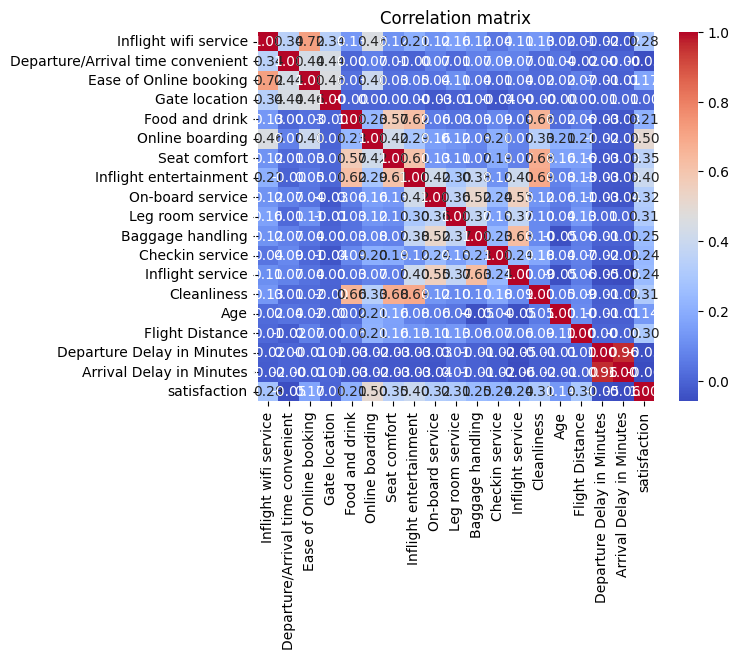

In [ ]:
#Correlation Analysis (Heatmap) -Identify which features have strong correlation with satisfaction.

service_cols = [
 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
 'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
 'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'
]

num_all = service_cols + ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']
sns.heatmap(df[num_all].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()



Features that most increase satisfaction: Online boarding, inflight entertainment, seat comfort, on-board service, leg room, cleanliness, inflight service, inflight wifi, and type of travel. Improving these can boost customer satisfaction.

Features that decrease satisfaction: Customer type shows a small negative correlation with satisfaction.

Features with little effect on satisfaction: Gender, age, flight distance, departure/arrival convenience, online booking ease, gate location, food & drink, baggage handling, check-in service, departure/arrival delays—these have weak correlations with satisfaction.

Other observations: Departure and arrival delays are strongly related to each other. Some service-related features are also positively correlated with each other.

--------**STEP6---------**

In [ ]:
#6.Grouped Statistics & Quick Ranking
for c in cat_cols:
    display(df.groupby(c)['satisfaction'].mean().sort_values(ascending=False).round(3))

corr_with_target = df.corr()['satisfaction'].abs().sort_values(ascending=False)
corr_with_target.head(15)
#Helps to see which categories have higher satisfaction %.

,satisfaction
Gender,
1,0.439
0,0.427


,satisfaction
Customer Type,
0,0.477
1,0.237


,satisfaction
Type of Travel,
0,0.583
1,0.102


,satisfaction
Class,
0,0.694
2,0.246
1,0.186


,satisfaction
satisfaction,1.000000
Online boarding,0.503557
Class,0.449321
Type of Travel,0.449000
Inflight entertainment,0.398059
Seat comfort,0.349459
On-board service,0.322383
Leg room service,0.313131
Cleanliness,0.305198
Flight Distance,0.298780


**Grouped Statistics (Mean Satisfaction by Category):**

  Gender: Very similar satisfaction levels (0.427 vs 0.439).

  Customer Type: Type 0 has much higher satisfaction (0.477) than Type 1 (0.237).

  Type of Travel: Type 0  shows much higher satisfaction (0.583) than Type 1 (0.102).

  Class: Class 0  has the highest satisfaction (0.694), followed by Class 2 (0.246) and Class 1 (0.186).

**Correlation Ranking (Absolute values with satisfaction):**

  Strongest correlations: Online boarding (0.50), Class (0.45), Type of Travel (0.45), Inflight entertainment (0.40), Seat comfort (0.35).

  Moderate correlations: On-board service, Leg room service, Cleanliness, Flight Distance, Inflight wifi.

  Weaker correlations: Baggage handling, Inflight service, Checkin service, Food and drink.

**Combined Insights:**

  Customer Type, Type of Travel, Class, and service-related features are the strongest drivers of satisfaction.

  Factors like delays, age, and convenience features have much weaker effects.

--------**STEP7---------**

In [31]:
#7.
df['TotalServiceScore'] = df[service_cols].sum(axis=1)
df['AvgServiceScore'] = df[service_cols].mean(axis=1)

frontline = ['Seat comfort','Inflight entertainment','On-board service','Inflight service','Cleanliness']
logistics = ['Checkin service','Baggage handling','Gate location','Ease of Online booking']
df['FrontlineScore'] = df[frontline].sum(axis=1)
df['LogisticsScore'] = df[logistics].sum(axis=1)

df[['TotalServiceScore','AvgServiceScore','FrontlineScore','LogisticsScore','satisfaction']].corr()['satisfaction'].sort_values(ascending=False)


,satisfaction
satisfaction,1.000000
TotalServiceScore,0.496138
AvgServiceScore,0.496138
FrontlineScore,0.457943
LogisticsScore,0.277791


**New Features Created:**

TotalServiceScore: Sum of all service-related scores.

AvgServiceScore: Average of all service-related scores.

FrontlineScore: Sum of in-flight service scores (seat comfort, inflight entertainment, on-board service, inflight service, cleanliness).

LogisticsScore: Sum of pre-flight/logistical service scores (check-in service, baggage handling, gate location, online booking ease).

**Correlation with Satisfaction:**

TotalServiceScore & AvgServiceScore: Strong positive correlation (~0.496), showing overall service quality strongly impacts satisfaction.

FrontlineScore: Positive correlation of 0.458, indicating in-flight service experience is highly influential.

LogisticsScore: Weaker positive correlation (0.278), meaning pre-flight/logistical services affect satisfaction but less strongly.

**Summary:**
Aggregated service scores highlight that overall service quality—especially in-flight services—strongly predicts customer satisfaction, while logistical aspects contribute positively but to a lesser extent.

--------**STEP8---------**

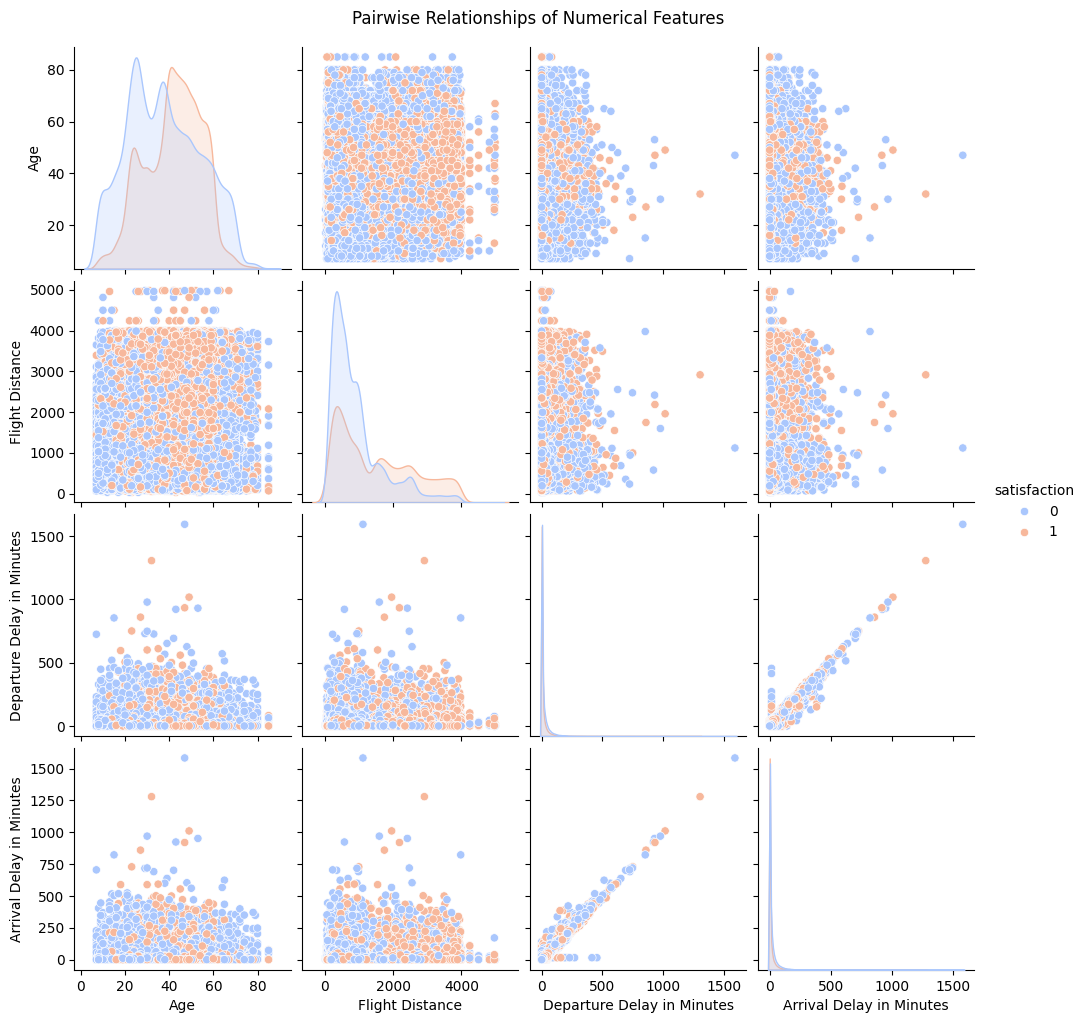

In [30]:
# 8.Pairwise Relationships (Numerical Features)
num_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

sns.pairplot(df[num_cols + ['satisfaction']], hue='satisfaction', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()


**Pairwise Relationship Insights:**

The pairplot shows the relationships between pairs of numerical features, separated by satisfaction level.

*   **Age:** There appear to be two main groups of travelers based on age, as seen in the diagonal KDE plots. The distribution of age is similar for both satisfied and dissatisfied customers.

*   **Flight Distance:** The distribution of flight distance is skewed to the right, with most flights being shorter. While there's a slight tendency for satisfied customers to have slightly longer flight distances, the overall distributions for both satisfaction levels are similar.

*   **Departure and Arrival Delays:** There's a strong positive correlation between departure and arrival delays, as expected. Most flights have zero delay. The distributions of delays are heavily skewed with a long tail of delayed flights. Both satisfied and dissatisfied customers experience delays, but the impact of delays on satisfaction is likely complex and not simply linear, as suggested by the correlation analysis.

**Summary:** The pairplot confirms the distributions of the numerical features and visualizes the relationships between them. It reinforces that age, flight distance, and delays have weaker, less straightforward relationships with satisfaction compared to the service-related features.

--------**STEP9---------**

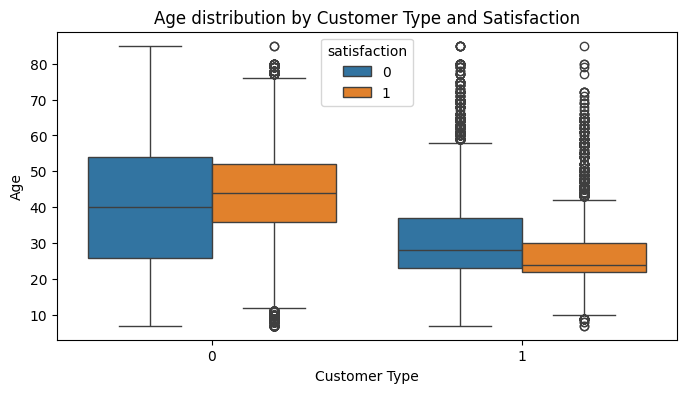

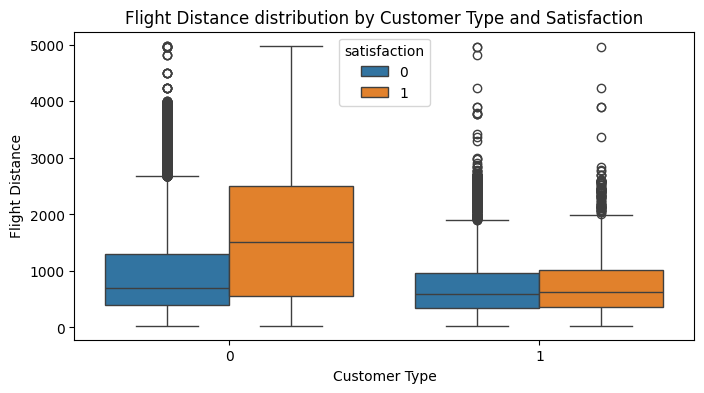

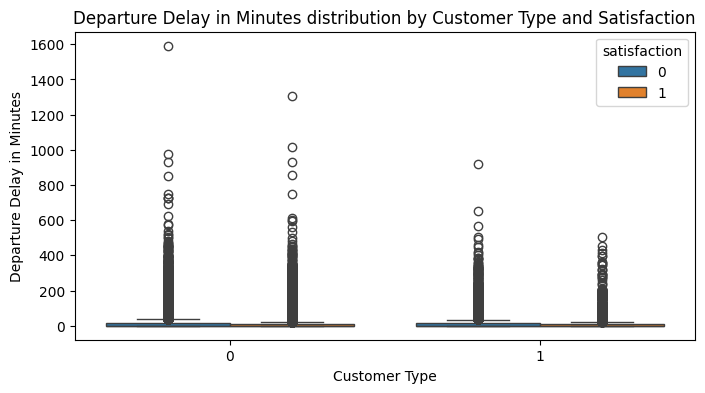

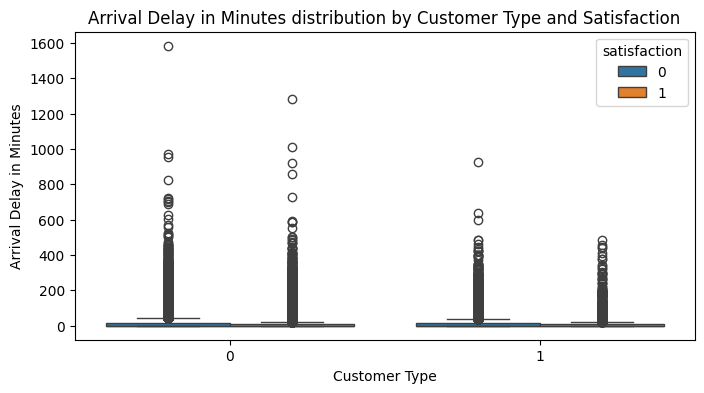

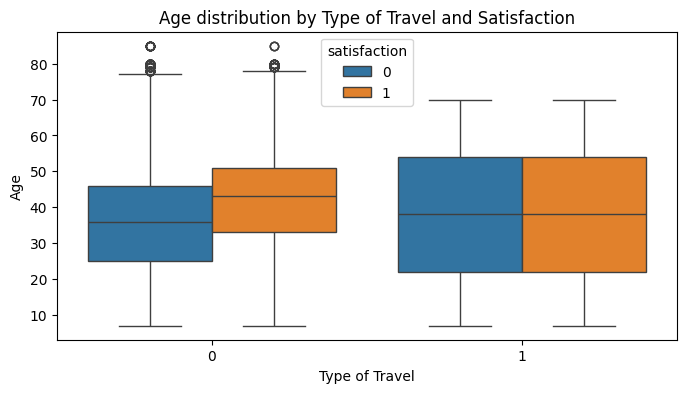

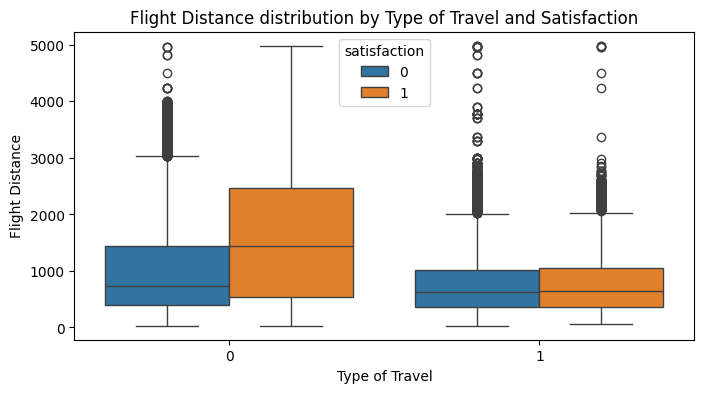

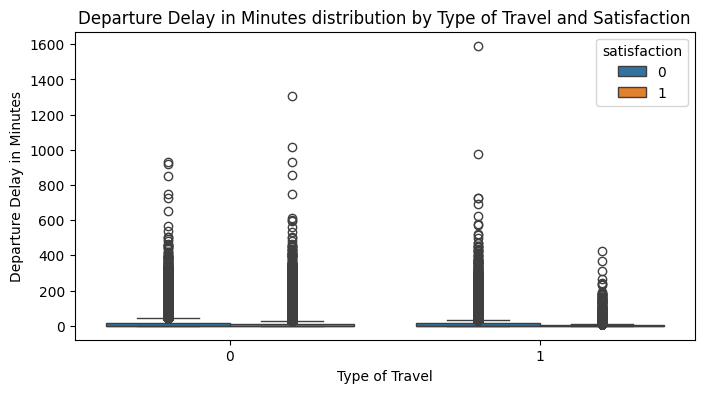

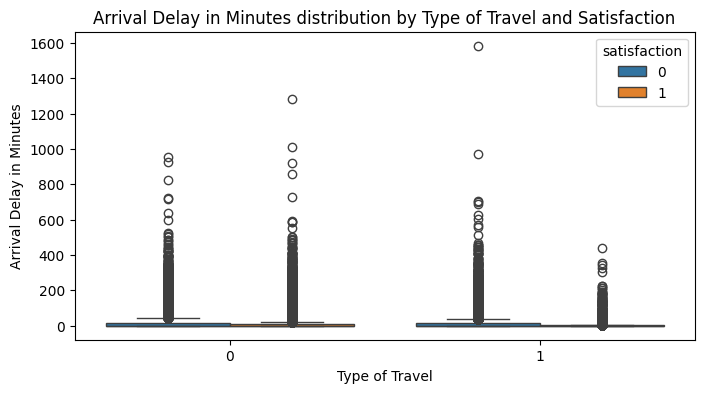

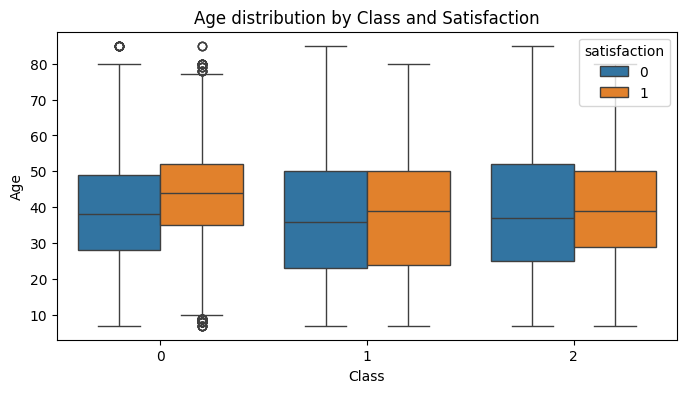

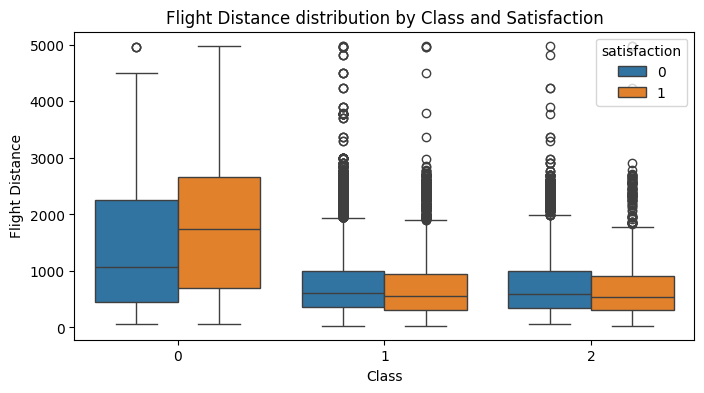

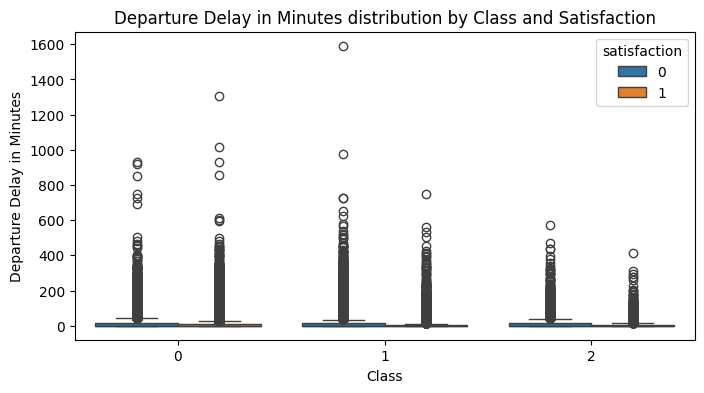

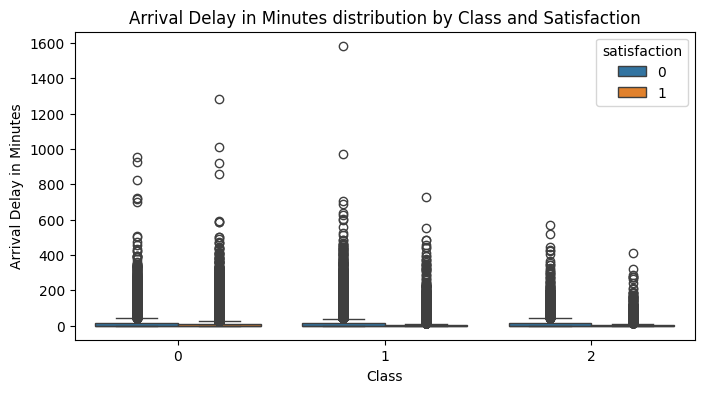

In [32]:
#9.Numerical Distribution by Categorical Features
cat_cols = ['Customer Type','Type of Travel','Class']

for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, hue='satisfaction', data=df)
        plt.title(f'{num} distribution by {cat} and Satisfaction')
        plt.show()


**Numerical Feature Distributions by Categorical Features and Satisfaction**

* Age:

Median age and spread are similar across Customer Type, Type of Travel, and Class for both satisfied and dissatisfied customers.

Slightly younger median for “Disloyal Customers” (Customer Type 1).

Overall, age has a weak correlation with satisfaction.

* Flight Distance:

Satisfied “Loyal Customers” and “Business Travelers” tend to have slightly longer flights.

Business Class (Class 0) has significantly longer flights than Economy and Economy Plus.

Satisfaction levels have minor influence on flight distance within each category.

* Departure and Arrival Delays:

Most flights have zero delay; many extreme outliers exist.

Median delay is 0 across categories and satisfaction levels.

No clear difference in delays between satisfied and dissatisfied customers, confirming weak correlation with satisfaction.

**Summary:**

Categorical factors (Customer Type, Type of Travel, Class) are strong drivers of satisfaction.

Numerical features like Age and Delays show little distinction across satisfaction levels.

Flight Distance shows subtle differences related to travel type and class, which might slightly influence satisfaction.

**--------STEP10---------**

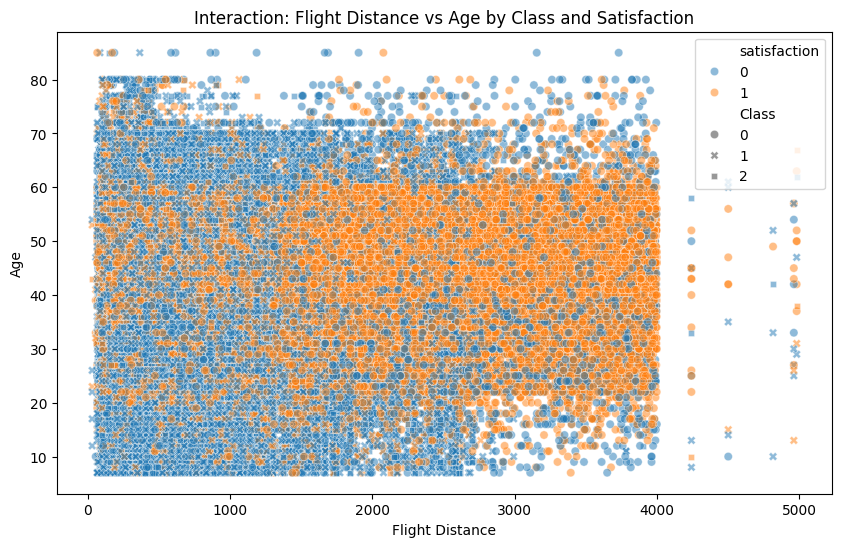

In [33]:
# 10.Interaction Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='Flight Distance', y='Age', hue='satisfaction', style='Class', data=df, alpha=0.5)
plt.title('Interaction: Flight Distance vs Age by Class and Satisfaction')
plt.show()

**Interaction: Flight Distance vs Age by Class and Satisfaction**

* Overall Distribution:

Younger travelers tend to take shorter flights; Business Class shows a wider age and flight distance range.

* Satisfaction Patterns:

Both satisfied and dissatisfied customers appear across all ages and flight distances.

No clear separation based solely on Age and Flight Distance.

* Class Patterns:

Business Class: Longer flights, wider age range, satisfied customers spread throughout.

Economy & Economy Plus: Mostly shorter to medium flights; Age distribution is slightly younger for Economy Plus.

* Insight:

Age and Flight Distance alone do not strongly determine satisfaction.

Satisfaction is likely driven more by service quality and categorical factors like Class, Customer Type, and Type of Travel.

***Summary:***

Class affects where passengers fall in Age vs Flight Distance, but satisfaction within these groups is mixed.

Confirms earlier findings that Age and Flight Distance are weaker predictors of satisfaction.

**--------STEP11---------**

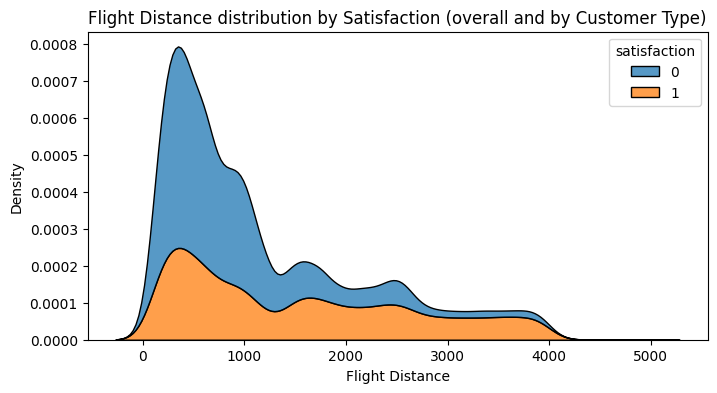

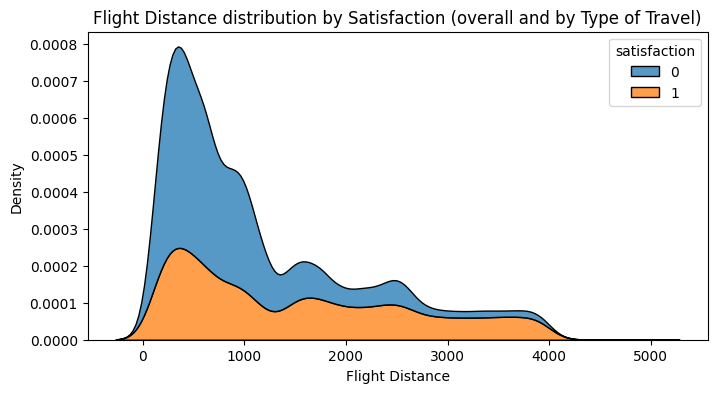

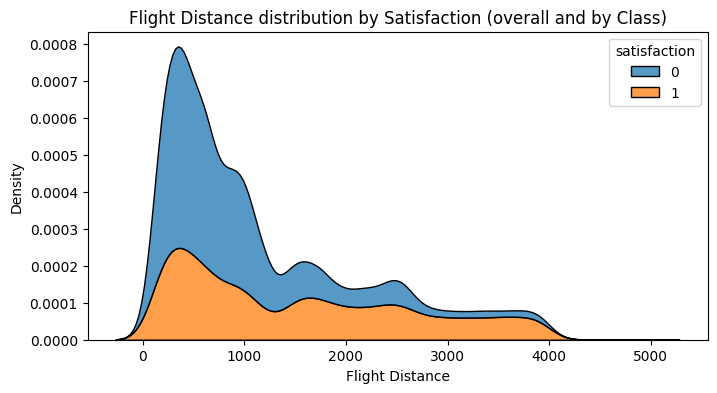

In [34]:
#11.Conditional KDE Plots
for cat in cat_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x='Flight Distance', hue='satisfaction', multiple='stack')
    plt.title(f'Flight Distance distribution by Satisfaction (overall and by {cat})')
    plt.show()


**Conditional KDE: Flight Distance by Satisfaction**

* Overall Distribution:

Flight distances are heavily right-skewed, with many short flights and a few very long flights.

* Distribution by Satisfaction:

Shorter flights have a higher proportion of dissatisfied customers.

Longer flights have a higher proportion of satisfied customers.

The peak of the satisfied distribution shifts slightly toward longer flights.

* By Categorical Features:

The same pattern holds across Customer Type, Type of Travel, and Class.

Business Class naturally has more longer flights, but satisfied customers still dominate longer distances within each category.

**Summary:**

Customers on longer flights are more likely to be satisfied.

Confirms the moderate positive correlation between Flight Distance and satisfaction.

***-------------------------------- Summary -----------------------------------***

**Top Insights**

* Service is Key: In-flight service features (Online Boarding, Inflight Wifi, Entertainment, Seat Comfort, On-board Service, Leg Room, Cleanliness) and overall service scores (TotalServiceScore) are the strongest drivers of satisfaction.

* Travel Context Matters: Customer Type, Type of Travel (Business vs Personal), and Class significantly influence satisfaction.

* Delays and Logistics Less Important: Flight delays and pre-flight logistics (check-in, baggage) have a smaller impact.

* Gender is Not Influential: Shows little difference in satisfaction.

* Age and Flight Distance: Some predictive power, but less than top service and travel features.

**Recommended Features for Modeling**

* Service Features: Online boarding, Inflight wifi, Inflight entertainment, Seat comfort, On-board service, Leg room service, Cleanliness.

* Aggregate Service Scores: TotalServiceScore (or AvgServiceScore), FrontlineScore.

* Categorical Features: Customer Type, Type of Travel, Class.

* Other Features: Age, Flight Distance, Departure Delay, Arrival Delay.